In [1]:
# Created 13Mar23
# To create df of clinics system sizes for heatmaps of S1-S4
# Second part of this code is for plotting
# See Jupyter notebook: 'sizes_clinics_S1-S4'
# check outputs with excel: 'S0-S4 analysis and check'
# previous version of this code: 'system_size_data_hp.py'

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.ticker import FormatStrFormatter  # to format ticks but doesn't work i think

# Move to path where csv are saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"
path

cwd = os.getcwd()
cwd

os.chdir(path)
cwd    # pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs'

In [2]:
# SCENARIO 1 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s1 = pd.read_csv("Optim_res_unmet_0_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s1 = s1[s1.Institution != 'School']  
# Groups clinics by Initial storage and PV size
clinics_s1 = clinics_s1.groupby(["Initial_storage_size","Initial_PV_size"])
# Counts unique site names to know number of sites per system size combination
clinics_s1_cnt = clinics_s1.Site_name.nunique()  # returns a series
clinics_s1_cnt.head()

# Convert series to df
clinics_s1_cnt_df = clinics_s1_cnt.to_frame()
# Pivot df so it has a wide-spread form
clinics_s1_cnt_df # to show in Jupyter

Site_name
Initial_storage_size Initial_PV_size           
3.0                  0.530                    1
5.0                  0.795                    1
                     1.325                    1
                     1.590                    1
6.0                  1.855                    2
                     2.120                    1
7.0                  1.855                    1
8.0                  1.590                    1
                     2.120                    1
                     2.650                    2
9.0                  3.180                    1
10.0                 1.590                    1
11.0                 3.180                    1
15.0                 2.385                    1
16.0                 3.975                    1
29.0                 5.830                    1

In [4]:
# to check there are 18 clinics
clinics_s1_cnt_df["Site_name"].sum()  # returns 18

18

In [12]:
# to know clinics min and max values (vmin & vmax)
clinics_s1_cnt_df["Site_name"].describe().round(2)   
                # returns: min= 1 (vmin), max=2 (vmax)

count    16.00
mean      1.12
std       0.34
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       2.00
Name: Site_name, dtype: float64

In [6]:
clinics_s1_hp = clinics_s1_cnt_df.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Site_name")
clinics_s1_hp # to show in Jupyter

Initial_PV_size,0.530,0.795,1.325,1.590,1.855,2.120,2.385,2.650,3.180,3.975,5.830
Initial_storage_size,,,,,,,,,,,
3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
10.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
15.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


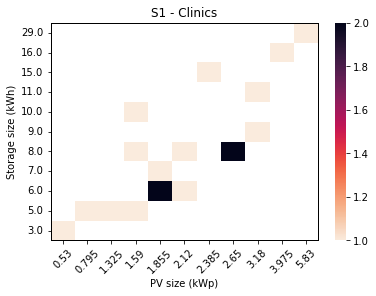

In [8]:
# S1 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(clinics_s1_hp, cmap="rocket_r") # annot=True
ax.invert_yaxis()
ax.set_title("S1 - Clinics")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [9]:
# SCENARIO 2 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s2 = pd.read_csv("Optim_res_unmet_0.01_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s2 = s2[s2.Institution != 'School']  
# Groups clinics by Initial storage and PV size
clinics_s2 = clinics_s2.groupby(["Initial_storage_size","Initial_PV_size"])  
# Counts unique site names to know number of sites per system size combination
clinics_s2_cnt = clinics_s2.Site_name.nunique()  # returns a series
clinics_s2_cnt.head()

# Convert series to df
clinics_s2_cnt_df = clinics_s2_cnt.to_frame()
# Pivot df so it has a wide-spread form
clinics_s2_cnt_df # to show in Jupyter

Site_name
Initial_storage_size Initial_PV_size           
2.0                  0.530                    1
                     0.795                    1
3.0                  1.060                    1
                     1.325                    2
4.0                  1.590                    1
5.0                  1.325                    1
                     1.590                    2
                     1.855                    3
6.0                  1.590                    1
                     1.855                    1
9.0                  2.650                    1
13.0                 2.120                    1
                     2.915                    1
26.0                 3.710                    1

In [10]:
# to check there are 18 clinics
clinics_s2_cnt_df["Site_name"].sum()  # returns 18

18

In [13]:
# to know clinics min and max values (vmin & vmax)
clinics_s2_cnt_df["Site_name"].describe().round(2)
                    # returns: min= 1 (vmin), max=3 (vmax)

count    14.00
mean      1.29
std       0.61
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       3.00
Name: Site_name, dtype: float64

In [14]:
clinics_s2_hp = clinics_s2_cnt_df.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Site_name")
clinics_s2_hp # to show in Jupyter

Initial_PV_size,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.650,2.915,3.710
Initial_storage_size,,,,,,,,,,
2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
13.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


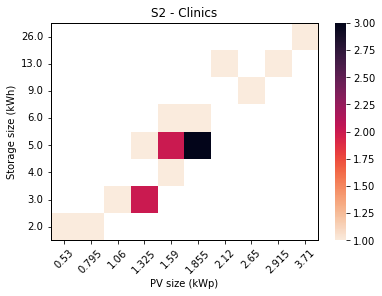

In [15]:
# S2 CLINIC SIZES PLOT (data as it is)
ax = sns.heatmap(clinics_s2_hp, cmap="rocket_r") # annot=True, vmin=1, vmax=4 
ax.invert_yaxis()
ax.set_title("S2 - Clinics")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [16]:
# SCENARIO 3 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s3 = pd.read_csv("Optim_res_unmet_0.05_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s3 = s3[s3.Institution != 'School']
# Groups clinics by Initial storage and PV size
clinics_s3 = clinics_s3.groupby(["Initial_storage_size","Initial_PV_size"])
# Counts unique site names to know number of sites per system size combination
clinics_s3_cnt = clinics_s3.Site_name.nunique()  # returns a series
clinics_s3_cnt.head()

# Convert series to df
clinics_s3_cnt_df = clinics_s3_cnt.to_frame()
# Pivot df so it has a wide-spread form
clinics_s3_cnt_df # to show in Jupyter

Site_name
Initial_storage_size Initial_PV_size           
1.0                  0.530                    1
2.0                  0.530                    1
                     1.060                    1
3.0                  0.530                    1
                     0.795                    1
                     1.060                    1
                     1.590                    1
4.0                  1.060                    3
                     1.325                    2
                     1.590                    1
5.0                  1.325                    1
7.0                  2.385                    1
10.0                 2.650                    1
11.0                 1.590                    1
18.0                 3.180                    1

In [17]:
# to check there are 18 clinics
clinics_s3_cnt_df["Site_name"].sum()  # returns 18

18

In [18]:
# to know clinics min and max values (vmin & vmax)
clinics_s3_cnt_df["Site_name"].describe().round(2)   
                    # returns: min= 1 (vmin), max= 3 (vmax)

count    15.00
mean      1.20
std       0.56
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       3.00
Name: Site_name, dtype: float64

In [19]:
clinics_s3_hp = clinics_s3_cnt_df.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Site_name")
clinics_s3_hp # to show in Jupyter

Initial_PV_size,0.530,0.795,1.060,1.325,1.590,2.385,2.650,3.180
Initial_storage_size,,,,,,,,
1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
4.0,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN
5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
11.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


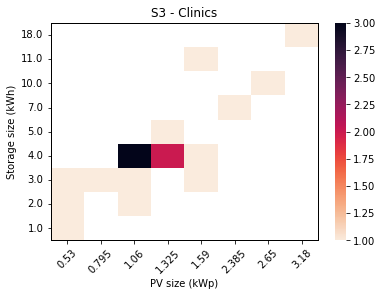

In [20]:
# S3 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(clinics_s3_hp, cmap="rocket_r")  # annot=True, vmin=1, vmax=4
ax.invert_yaxis()
ax.set_title("S3 - Clinics")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [21]:
# SCENARIO 4 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s4 = pd.read_csv("Optim_res_unmet_0.1_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s4 = s4[s4.Institution != 'School']
# Groups clinics by Initial storage and PV size
clinics_s4 = clinics_s4.groupby(["Initial_storage_size","Initial_PV_size"])
# Counts unique site names to know number of sites per system size combination
clinics_s4_cnt = clinics_s4.Site_name.nunique()  # returns a series
clinics_s4_cnt.head()

# Convert series to df
clinics_s4_cnt_df = clinics_s4_cnt.to_frame()
# Pivot df so it has a wide-spread form
clinics_s4_cnt_df # to show in Jupyter

Site_name
Initial_storage_size Initial_PV_size           
1.0                  0.530                    1
2.0                  0.265                    1
                     0.530                    1
                     0.795                    1
3.0                  0.795                    2
                     1.060                    4
4.0                  1.060                    2
                     1.325                    2
6.0                  2.120                    1
9.0                  1.325                    1
                     2.120                    1
14.0                 2.915                    1

In [22]:
# to check there are 18 clinics
clinics_s4_cnt_df["Site_name"].sum()  # returns 18

18

In [23]:
# to know clinics min and max values (vmin & vmax)
clinics_s4_cnt_df["Site_name"].describe().round(2)
                    # returns: min= 1 (vmin), max= 4 (vmax)

count    12.0
mean      1.5
std       0.9
min       1.0
25%       1.0
50%       1.0
75%       2.0
max       4.0
Name: Site_name, dtype: float64

In [24]:
clinics_s4_hp = clinics_s4_cnt_df.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Site_name")
clinics_s4_hp # to show in Jupyter

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,2.120,2.915
Initial_storage_size,,,,,,,
1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN
4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
9.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
14.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


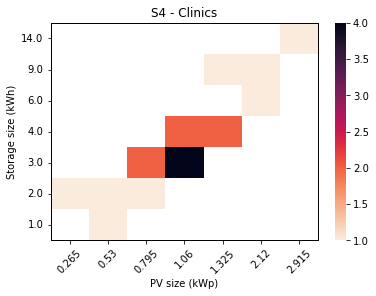

In [25]:
# S4 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(clinics_s4_hp, cmap="rocket_r") # annot=True
ax.invert_yaxis()
ax.set_title("S4 - Clinics")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

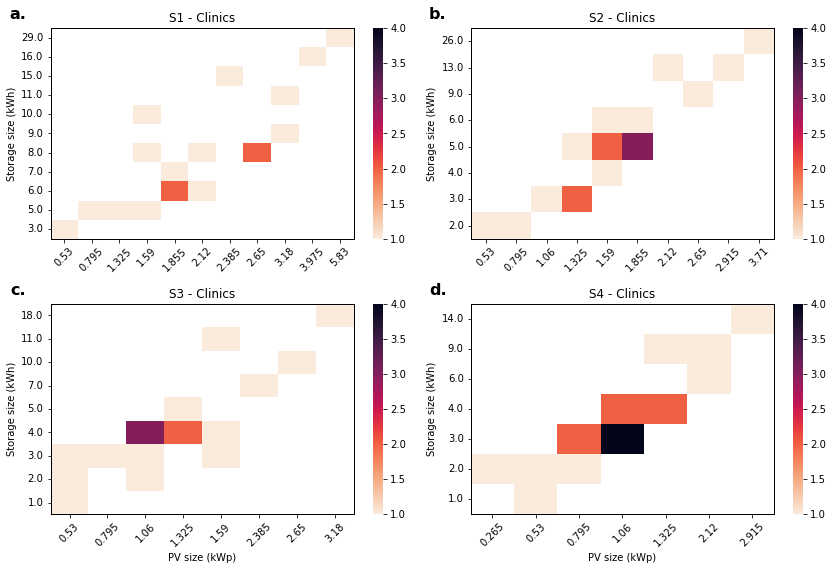

In [26]:
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale - vmin=1, vmax=4)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left, add (annot=True) to see numbers
sns.heatmap(
    clinics_s1_hp, vmin=1, vmax=4, cmap="rocket_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right, add (annot=True) to see numbers
sns.heatmap(
    clinics_s2_hp, vmin=1, vmax=4, cmap="rocket_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    clinics_s3_hp, vmin=1, vmax=4, cmap="rocket_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right, add (annot=True) to see numbers
sns.heatmap(
    clinics_s4_hp, vmin=1, vmax=4, cmap="rocket_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

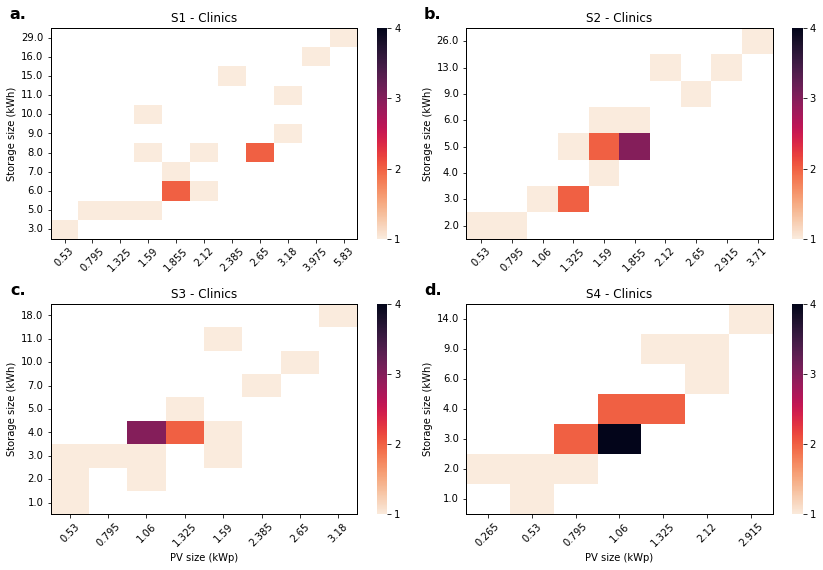

In [27]:
# Same as before (Plotting data as it is, so each has different axis values, but setting vmin and vmax so all
# scenarios have the same colour scale, without annotations). The following plot only shows integer values in 
# colour scale (to avoid having half options e.g., 1.5 sites in one bin/system configuration)

# Subplots of S1-S4 with data as it is (different axis but same colour scale - vmin=1, vmax=4)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left, add (annot=True) to see numbers
sns.heatmap(
    clinics_s1_hp, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right, add (annot=True) to see numbers
sns.heatmap(
    clinics_s2_hp, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    clinics_s3_hp, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right, add (annot=True) to see numbers
sns.heatmap(
    clinics_s4_hp, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

In [28]:
# Extending axis to facilitate comparison across scenarios
# to print ranges of axis (storage size - S1 has the largest)
for p in range(1, 30):
    print(p, end=', ')

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

In [29]:
# to print ranges of axis (PV size - S1 has the largest) with better format
for i in (np.arange(0.265, 6.095, 0.265)).round(3):
    print(i, end=', ')

0.265, 0.53, 0.795, 1.06, 1.325, 1.59, 1.855, 2.12, 2.385, 2.65, 2.915, 3.18, 3.445, 3.71, 3.975, 4.24, 4.505, 4.77, 5.035, 5.3, 5.565, 5.83, 

In [30]:
# CHANGE DF TO EXTEND X AND Y AXIS AND REINDEX DF TO COMPARE PLOTS
# S1
clinics_s1_hp_ext = clinics_s1_hp.reindex(range(1,30), axis=0) # fill_value=0
clinics_s1_hp_ext = clinics_s1_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)
clinics_s1_hp_ext

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.650,...,3.445,3.710,3.975,4.240,4.505,4.770,5.035,5.300,5.565,5.830
Initial_storage_size,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# S2
clinics_s2_hp_ext = clinics_s2_hp.reindex(range(1,30), axis=0) # fill_value=0
clinics_s2_hp_ext = clinics_s2_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)
clinics_s2_hp_ext

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.650,...,3.445,3.710,3.975,4.240,4.505,4.770,5.035,5.300,5.565,5.830
Initial_storage_size,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# S3
clinics_s3_hp_ext = clinics_s3_hp.reindex(range(1,30), axis=0) # fill_value=0
clinics_s3_hp_ext = clinics_s3_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)
clinics_s3_hp_ext

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.650,...,3.445,3.710,3.975,4.240,4.505,4.770,5.035,5.300,5.565,5.830
Initial_storage_size,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# S4
clinics_s4_hp_ext = clinics_s4_hp.reindex(range(1,30), axis=0) # fill_value=0
clinics_s4_hp_ext = clinics_s4_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)
clinics_s4_hp_ext

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.650,...,3.445,3.710,3.975,4.240,4.505,4.770,5.035,5.300,5.565,5.830
Initial_storage_size,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Setting style for plotting
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")
#sns.set_context("paper")  # poster

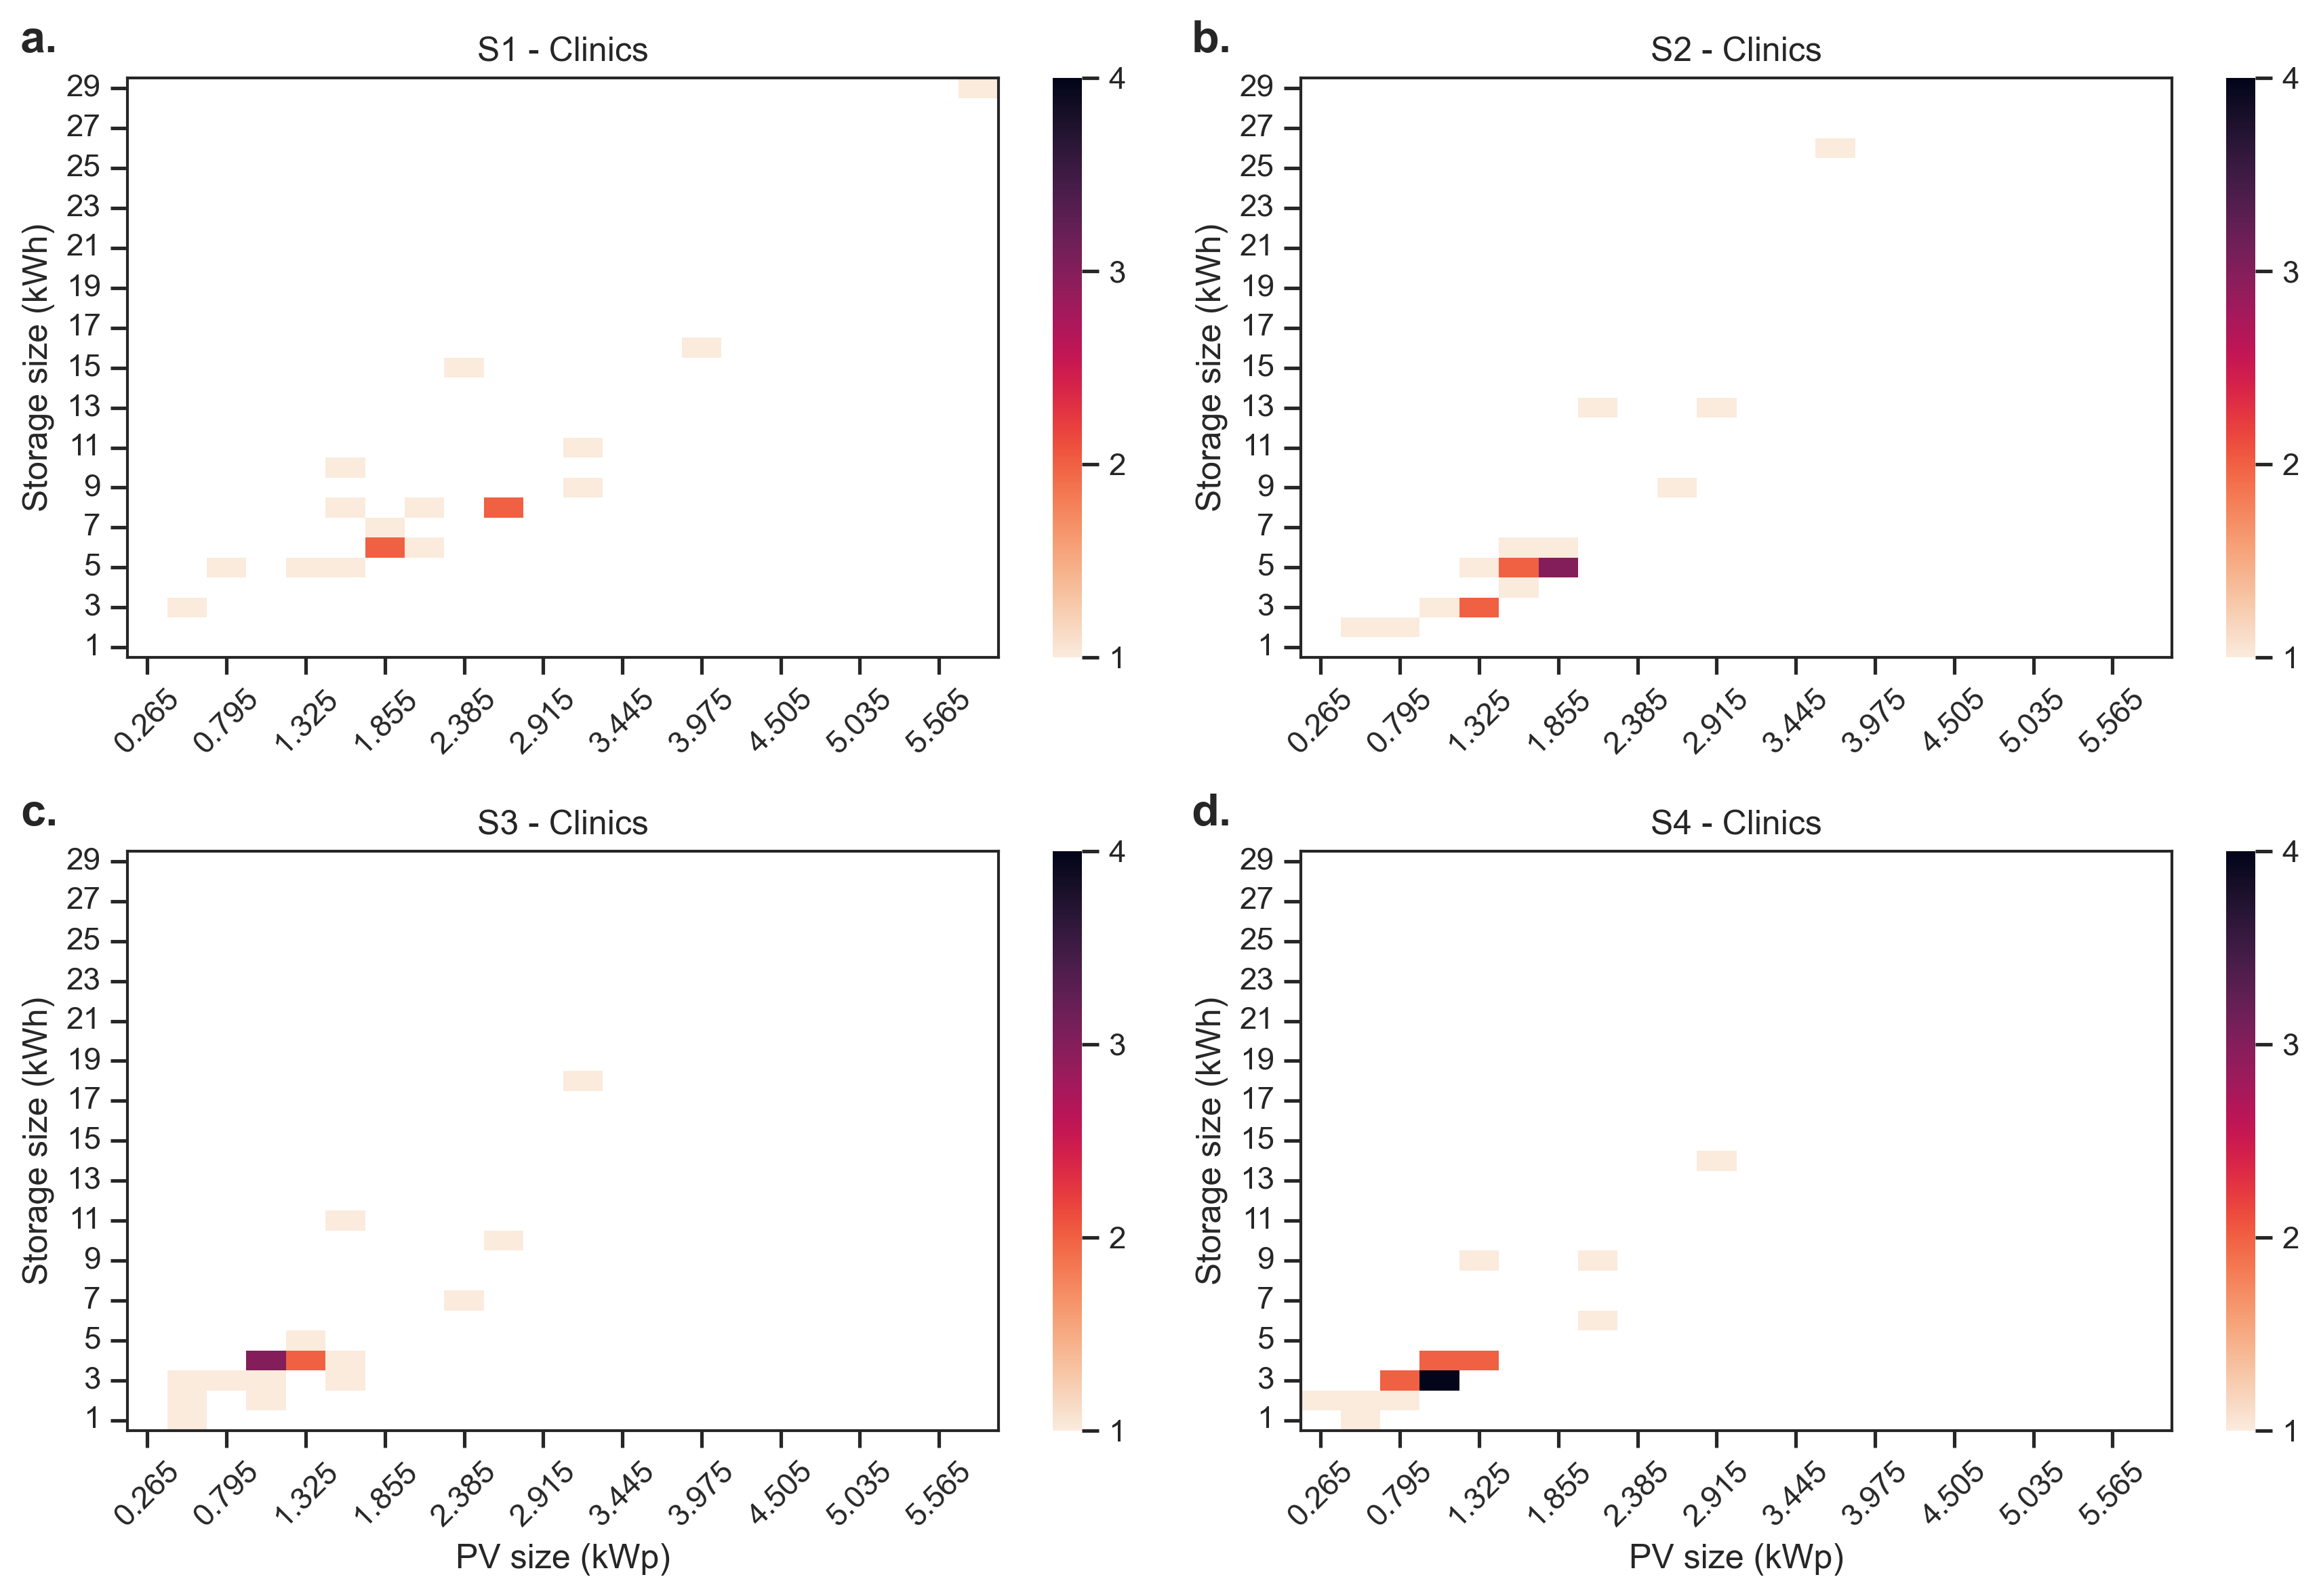

In [36]:
# Subplots of S1-S4 with same axis (same colour scale - vmin=1, vmax=4)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left, add (annot=True) to see numbers
sns.heatmap(
    clinics_s1_hp_ext, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right, add (annot=True) to see numbers
sns.heatmap(
    clinics_s2_hp_ext, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    clinics_s3_hp_ext, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right, add (annot=True) to see numbers
sns.heatmap(
    clinics_s4_hp_ext, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

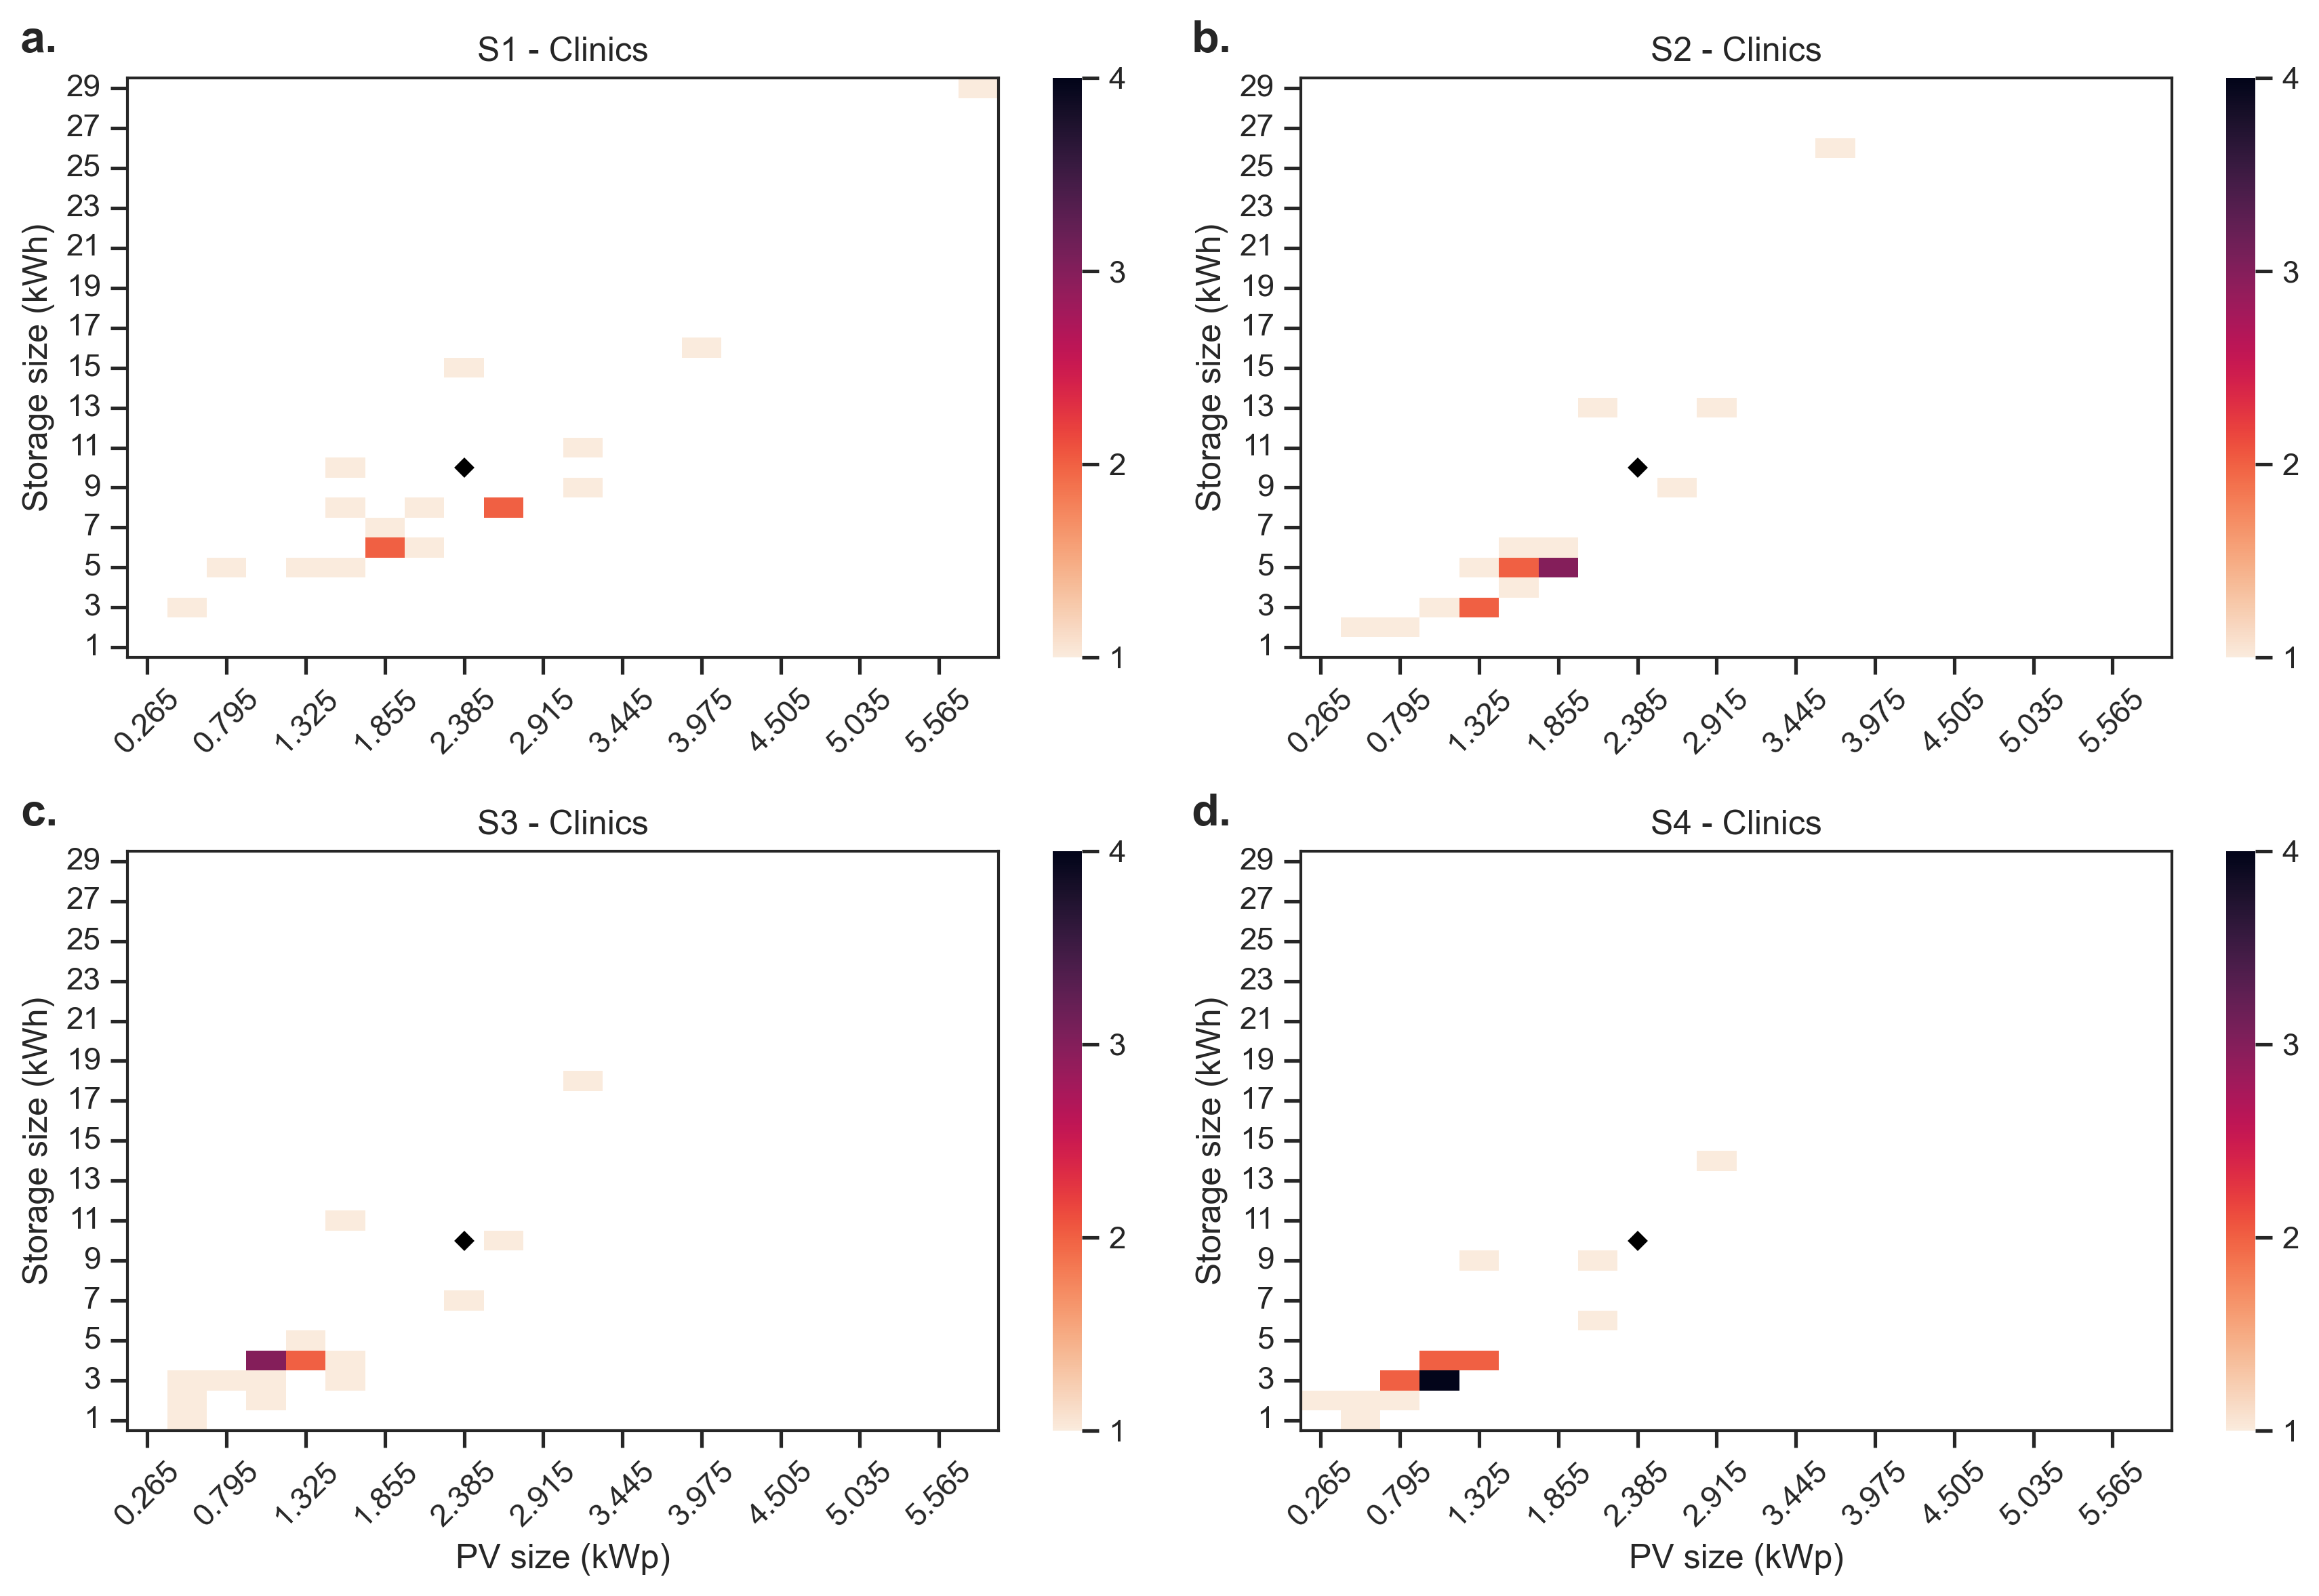

In [38]:
# Same plot but adding Rhino systems as data point
# Subplots of S1-S4 with same axis (same colour scale - vmin=1, vmax=4)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left, add (annot=True) to see numbers
sns.heatmap(
    clinics_s1_hp_ext, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey", "ms=5"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right, add (annot=True) to see numbers
sns.heatmap(
    clinics_s2_hp_ext, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    clinics_s3_hp_ext, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right, add (annot=True) to see numbers
sns.heatmap(
    clinics_s4_hp_ext, vmin=1, vmax=4, cmap="rocket_r", cbar_kws={'ticks':[1, 2, 3, 4]},
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

In [ ]:
# change ms number to change marker size

# check outputs with excel: 'S0-S4 analysis and check'
# Go to tab of scenario I want to check, filter by school/clinic, PV and/or storage size to
# see how many sites were found in each optimum system configuration (bin)

# See more on customising heatmap: 
# https://www.python-graph-gallery.com/91-customize-seaborn-heatmap

# Code for making subplots (BW):
#  https://gist.github.com/BenWinchester/b80dacf73507f05162f865fb04845359

# Ultimate guide to Heatmaps:
# https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/